In [2]:
from data import *
from concept import *
from reasoning import *
data = get_data(True)['42a50994']

In [3]:
patterns = ColorMap.get_all_patterns(data.train)
patterns = list(patterns.items())
print(len(patterns))
# f = ColorMap(patterns)
# f(data.test[0].input).list
# data.test[0].output.list

253


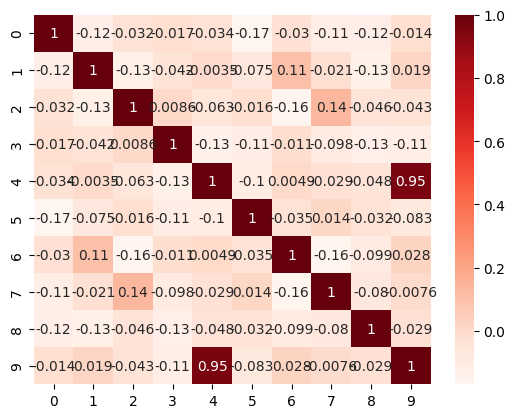

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

patterns_np = np.array([list(i) + [o] for i, o in patterns])
patterns_df = pd.DataFrame(patterns_np)
cor = patterns_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

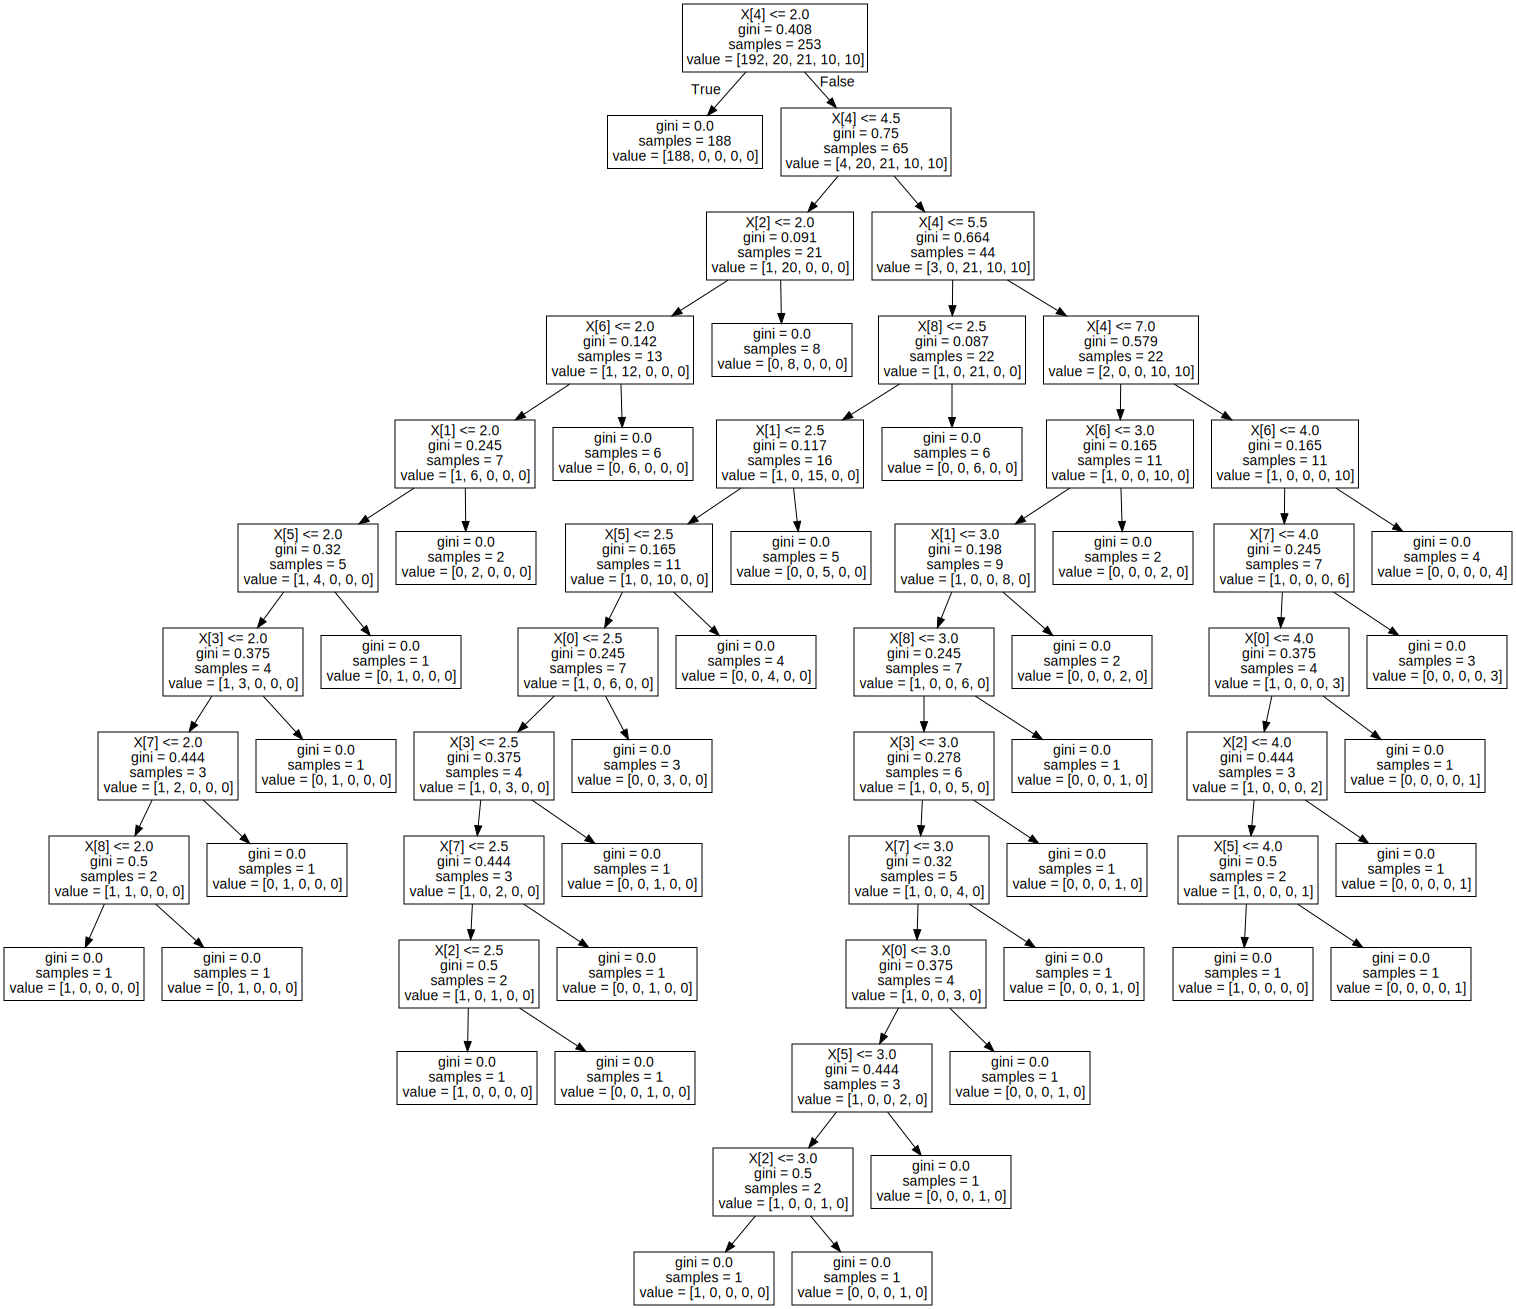

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text, export_graphviz

x = patterns_np[:, :-1]
y = patterns_np[:, -1]

clf = DecisionTreeClassifier()
clf.fit(x, y)

import graphviz
graphviz.Source(export_graphviz(clf))
# print(export_text(clf))

In [6]:
def generate_patterns(patterns):
    combined_patterns = []
    combined = []
    left_patterns = patterns.copy()
    for i1, o1 in patterns:
        if i1 in combined:
            continue
        cannot = True
        for i2, o2 in left_patterns:
            if o1 == o2 and sum([a != b for a, b in zip(i1, i2)]) == 1:
                new_i = [(a, b) if a != b else a for a, b in zip(i1, i2)]
                combined_patterns.append((tuple(new_i), o1))
                combined.append(i2)
                left_patterns.remove((i1, o1))
                left_patterns.remove((i2, o2))
                cannot = False
                break
        if cannot:
            combined_patterns.append((i1, o1))
    print(len(combined_patterns))
    print(len(left_patterns))
    return combined_patterns

p = generate_patterns(patterns)
p = generate_patterns(p)
generate_patterns(p)

158
63
149
140
149
149


[((0, 0, 0, 0, 0, (8, 0), 0, 8, 0), 0),
 ((0, (0, 8), 0, 0, 8, 0, 8, 0, 0), 8),
 ((0, (0, 8), 0, (8, 0), 0, 0, 0, 0, 0), 0),
 ((0, 0, 8, 0, 8, 0, 0, 0, 0), 8),
 ((8, 0, 0, (0, 8), 0, 0, 0, 0, 0), 0),
 ((0, 0, 0, 0, 0, 0, (0, 8), 0, 8), 0),
 ((0, 0, 0, (0, 8), 0, 0, 8, 0, 0), 0),
 ((0, 0, 0, 0, 0, 8, 0, 0, (8, 0)), 0),
 ((0, 0, 0, 0, 8, 0, 0, 8, (0, 8)), 8),
 ((0, 0, 0, 0, ((8, 6), (5, 4)), 0, 0, 0, 0), 0),
 ((0, 0, 0, 8, 0, 8, 0, 0, 0), 0),
 ((0, 0, 0, 0, 0, 0, 0, 8, 8), 0),
 ((0, 0, 8, 0, 0, 8, (8, 0), 8, 0), 0),
 (((0, 8), 0, 8, 0, 0, 0, 0, 0, 0), 0),
 ((0, 0, 0, 0, 8, 8, 0, 0, 8), 8),
 ((0, 0, 8, 8, 8, 0, 0, 8, 0), 8),
 ((0, 8, 0, (8, 0), 0, 0, 8, 0, 0), 0),
 ((0, 0, 8, 0, 0, 0, 0, 0, 8), 0),
 ((0, 8, 8, 0, 0, 8, 0, 8, 0), 0),
 ((8, 8, 0, 0, 8, 0, 8, 0, 0), 8),
 ((0, 0, 0, 0, 0, 8, 8, 0, 0), 0),
 ((0, (0, 8), 8, 8, 0, 0, 0, 0, 0), 0),
 ((0, 0, 8, 0, 0, 0, 0, 8, 0), 0),
 ((0, 0, 0, 8, 0, 0, 8, 8, 0), 0),
 ((0, 8, 0, 0, 8, 8, 8, 0, 0), 8),
 ((8, 0, 0, 8, 8, 0, 0, 0, 0), 8),
 ((8, 8, 0

In [4]:
img = data.test[0].input
def get_inputs(i, j):
    inputs = []
    for x in range(-1, 2):
        for y in range(-1, 2):
            inputs.append(img[i+x, j+y])
    return tuple(inputs)
def f(i, j):
    inputs = get_inputs(i, j)
    if inputs in patterns:
        return patterns[inputs]
    else:
        for pattern, color in patterns.items():
            diff = 0
            for x, y in zip(inputs, pattern):
                if x != y and x != 0 and y != 0:
                    diff += 1
            if diff == 0:
                return color
        return 0

In [7]:
h, w = img.shape
gt = data.test[0].output
for i in range(h):
    for j in range(w):
        inputs = get_inputs(i, j)
        if inputs in patterns:
            assert gt[i, j] == patterns[inputs]
        else:
            print(i, j, inputs)
            assert gt[i, j] == 0

1 4 (1, 0, 0, 0, 0, 0, 0, 1, 0)
4 4 (0, 0, 0, 1, 0, 0, 0, 0, 1)
5 4 (1, 0, 0, 0, 0, 1, 0, 0, 0)
6 4 (0, 0, 1, 0, 0, 0, 1, 0, 1)
6 5 (0, 1, 0, 0, 0, 0, 0, 1, 0)
6 6 (1, 0, 1, 0, 0, 0, 1, 0, 0)
